# Business Understanding

Questions:
     
        Q1.Find out how many customers are in the churn category?
            
        Q2.Which customers have higher churn rate?
        
        Q3.Is there any noticeable difference in customer net worth category when it comes to churn.
        
        Q4.Which customers will tend to have higher balance?

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")


In [3]:
#read the dataset
dataset = pd.read_csv("churn_prediction.csv")

# Data Analysis

In [4]:
#check the shape and column of the dataset
dataset.shape, dataset.columns

((28382, 21),
 Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
        'city', 'customer_nw_category', 'branch_code',
        'days_since_last_transaction', 'current_balance',
        'previous_month_end_balance', 'average_monthly_balance_prevQ',
        'average_monthly_balance_prevQ2', 'current_month_credit',
        'previous_month_credit', 'current_month_debit', 'previous_month_debit',
        'current_month_balance', 'previous_month_balance', 'churn'],
       dtype='object'))

So we can see, We have data for 28382 customers with 22 columns. So, essentially we have 21 features and 1 target column which is churn.

In [5]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [6]:
dataset.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

 Here, we have a mix of categorical, numerical and ordinal variables as shown. There are missing values also in some of the features.

# Q1.Find out how many customers are in the churn category?

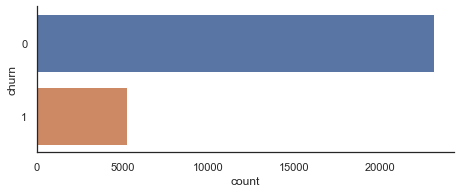

In [7]:
ax = sns.catplot(y="churn", kind="count", data=dataset, height=2.6, aspect=2.5, orient='h')

In [8]:
dataset['churn'].value_counts(normalize = True)

0    0.814671
1    0.185329
Name: churn, dtype: float64

above result shows that, around 18% customers are churning.

In [9]:
#use a groupby function to check the mean values of balance features.
numerical_cols = ['customer_id', 'vintage', 'age', 'dependents', 
       'customer_nw_category', 'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']
dataset[numerical_cols].describe()

,customer_id,vintage,age,dependents,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,28382.000000,28382.000000,28382.000000,25919.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04
mean,15143.508667,2364.336446,48.208336,0.347236,2.225530,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03
std,8746.454456,1610.124506,17.807163,0.997661,0.660443,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04
min,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,7557.250000,1121.000000,36.000000,0.000000,2.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03
50%,15150.500000,2018.000000,46.000000,0.000000,2.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03
75%,22706.750000,3176.000000,60.000000,0.000000,3.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03
max,30301.000000,12899.000000,90.000000,52.000000,3.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06


In [10]:
cols = ['current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
        'current_month_credit','previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']
dataset.groupby(['customer_nw_category'])[cols].mean()

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
customer_nw_category,,,,,,,,,,
1,12883.682913,13436.613544,13098.982716,11810.444511,7728.400137,9409.866028,7911.434080,8086.710342,12878.068674,13242.281037
2,7773.279345,7744.492544,7839.095235,7433.073141,3749.500743,2893.806560,3894.684063,3163.730233,7858.371677,7794.672359
3,4795.520175,4957.438675,4947.972060,4959.714499,1401.650598,1535.054349,1758.351527,1851.125018,4873.170891,4954.843500


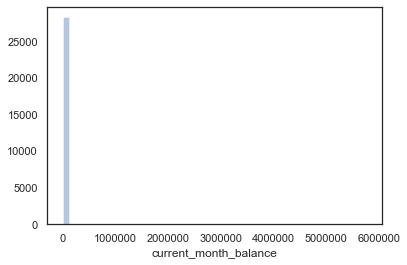

In [11]:
sns.distplot(dataset['current_month_balance'], kde = False)
plt.show()

we can see the huge outliers in both positive and negative directions. In this case, we could convert such columns to log and then check the distributions.However, since there are negative values, it cannot be a direct log conversion as log of negative numbers is not defined.To tackle this, we add a positive constant within the log as a correction

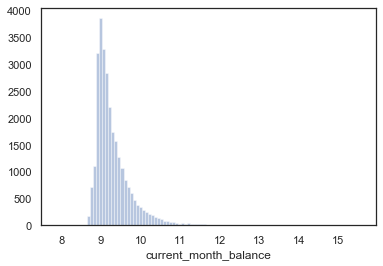

In [12]:
# To account for negative values we add a constant value within log
temp = np.log(dataset['current_month_balance'] + 6000) 

sns.distplot(temp, kde = False, bins = 100)
plt.show()

Now, we can see more clearly that this is a right skewed feature and we have much more clarity on its distribution.

In [13]:
#Credit and Debits for current and previous months
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data = pd.DataFrame()

for i in cr_dr_cols:
    data[str('log_')+ i] = np.log(dataset[i])

log_dr_cr_cols = data.columns

In [14]:
data['churn'] = dataset['churn']

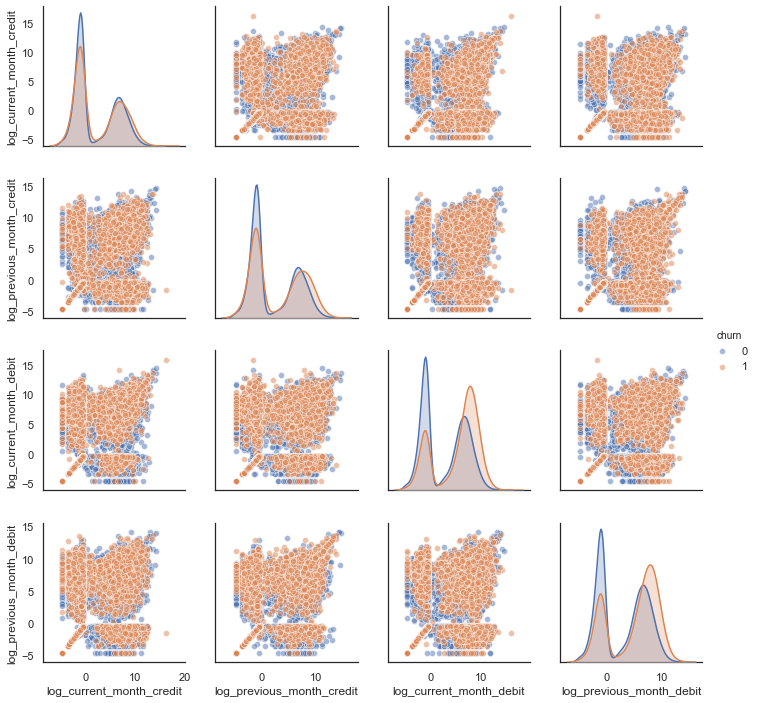

In [15]:
sns.pairplot(data,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.

Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. 

we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature



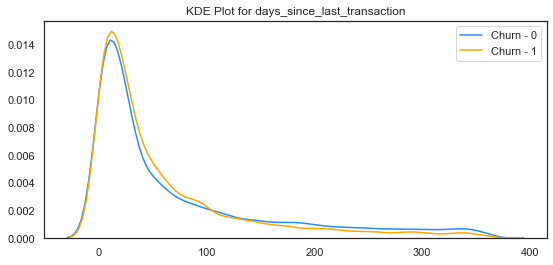

In [16]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE Plot for {}".format(feature))
    ax0 = sns.kdeplot(dataset[dataset['churn'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Churn - 0')
    ax1 = sns.kdeplot(dataset[dataset['churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn - 1')

kdeplot('days_since_last_transaction')

There is no significant difference between the distributions for churning and non churning customers when it comes to days since last transaction.


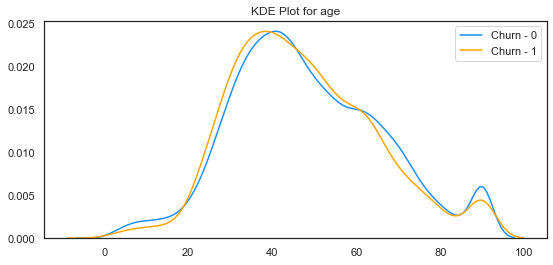

In [17]:
kdeplot('age')

Similarly, age also does not significantly affect the churning rate. However, customers above 80 years of age less likely to churn

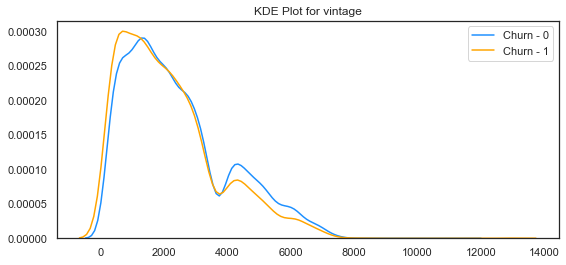

In [18]:
kdeplot('vintage')

For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 

In [19]:
#function to quickly compare churn rates for different categories in each feature.
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = dataset.groupby(feature)['churn'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = dataset[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()

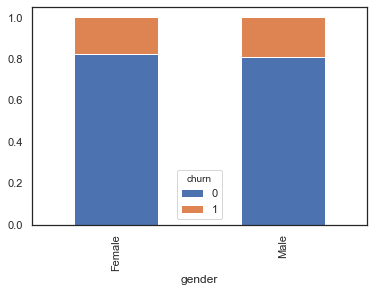

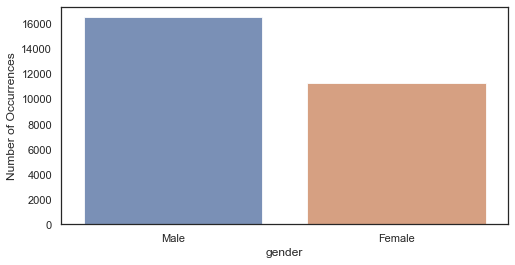

In [20]:
barplot_percentages("gender")

# Q.2 Which customers have higher churn rate?

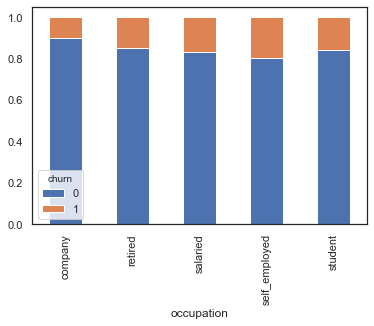

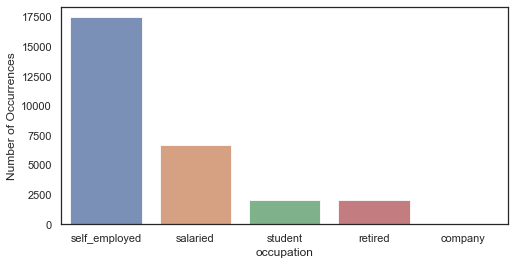

In [21]:
barplot_percentages("occupation")

Self Employed and salaried have higher churn rate and are the major categories.

# Q3.Is there any noticeable difference in customer net worth category when it comes to churn.

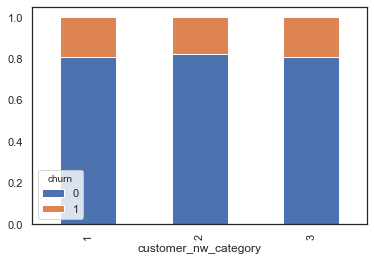

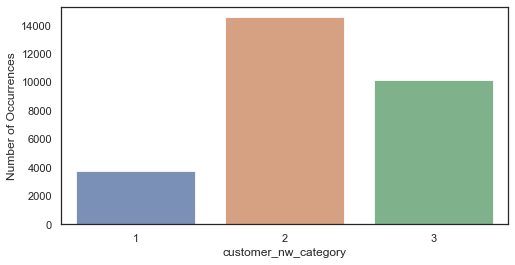

In [22]:
barplot_percentages("customer_nw_category")

Not much difference in customer net worth category when it comes to churn.

# Q4.Which customers will tend to have higher balance?

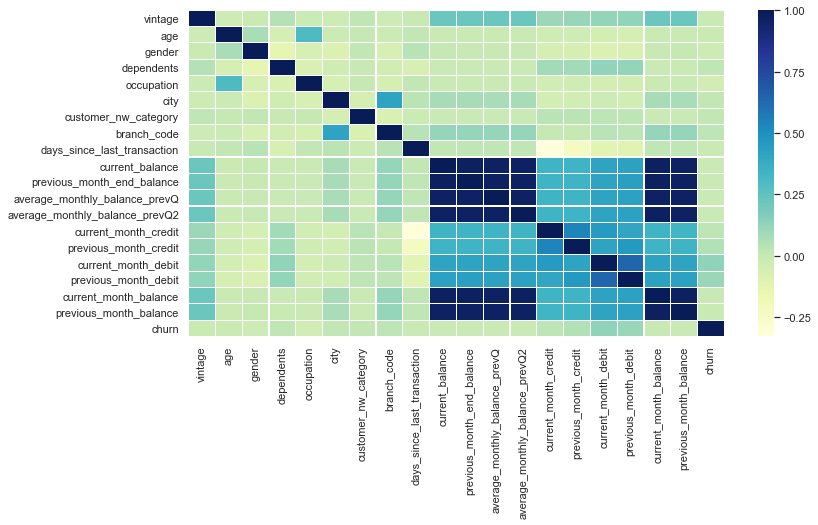

In [23]:
plt.figure(figsize=(12, 6))
dataset.drop(['customer_id'],
        axis=1, inplace=True)
corr = dataset.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


The balance features are highly correlated as can be seen from the plot.
    
Other variables have correlations but on the lower side.
    
Debit values have the highest correlation amongst the balance features.
    
Interestingly vintage has a considerable correlation with all the balance features which actually makes sense since older customers will tend to have higher balance.



# Missing Values

In [24]:
pd.isnull(dataset).sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

The result of this function shows that there are quite a few missing values in columns gender, dependents, city, days since last transaction and Percentage change in credits.

# Missing Value imputation

In [25]:
dataset['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

first we will convert the gender into 0/1 and then replace missing values with -1

In [26]:
gender_data = {'Male': 1, 'Female':0}
dataset.replace({'gender': gender_data}, inplace = True)

In [27]:
dataset['gender'] = dataset['gender'].fillna(-1)

In [28]:
dataset['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [29]:
dataset['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [30]:
dataset['dependents'] = dataset['dependents'].fillna(0)
dataset['occupation'] = dataset['occupation'].fillna('self_employed')

In [31]:
#City can be imputed with most common category 1020
dataset['city'] = dataset['city'].fillna(1020)

In [32]:
#A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999.
dataset['days_since_last_transaction'] = dataset['days_since_last_transaction'].fillna(999)

# Data Preparation

In [33]:
# Convert occupation to one hot encoded features
dataset = pd.concat([dataset,pd.get_dummies(dataset['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [34]:
#Scaling Numerical Features for Logistic Regression
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    dataset[i] = np.log(dataset[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(dataset[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [35]:
data_og = dataset.copy()
dataset = dataset.drop(columns = num_cols,axis = 1)
dataset = dataset.merge(scaled,left_index=True,right_index=True,how = "left")

In [36]:
y = dataset.churn

In [37]:
X = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [38]:
x = dataset[X]

In [39]:
# Splitting the data into Train and Validation set
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=11, stratify = y)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score,accuracy_score

In [41]:
logreg = LogisticRegression()

In [42]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logreg.predict(x_test)

In [44]:

predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
confusion_matrix(y_test, predictions)

array([[7589,  119],
       [1527,  226]], dtype=int64)

In [56]:
accuracy_score(y_test, predictions)

0.8260226191734489

In [57]:
precision_score(y_test, predictions)

0.6550724637681159

# ROC Curve

In [53]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


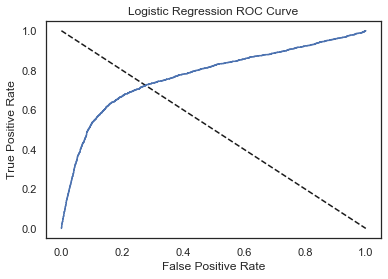

In [54]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()